# Data analysis of Seattle airbnb data 

## Business understanding
The airbnb data consists of listing data which has the information of all the airbnbs in Seattle area. Calendar mainly deals with calendar data which has date and price information of a listing. The reviews deals with various reviews and the exact reviewer with reviewer id as well. For use case we only deal with listing as it contains most concise data needed to ask some questions.

## Questions that I want to be answered 

* Does price of the property affect the review score?
* Does cancellation policy affect the review score?
* The most expensive neighborhood?
* Does host listings count affect the review score?

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

### Gather data

In [7]:
df_calendar=pd.read_csv('./calendar.csv')
df_listing=pd.read_csv('./listings.csv')
df_reviews=pd.read_csv('./reviews.csv')

### Understanding the data 

In [8]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [10]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Cleaning of data

In [11]:
missing_values = df_listing.isna().mean()
cols_with_75_pct_missing = missing_values[missing_values >= 0.75].index
result = df_listing[cols_with_75_pct_missing]
print(result)

      square_feet  license
0             NaN      NaN
1             NaN      NaN
2             NaN      NaN
3             NaN      NaN
4             NaN      NaN
...           ...      ...
3813          NaN      NaN
3814          NaN      NaN
3815          NaN      NaN
3816          NaN      NaN
3817          NaN      NaN

[3818 rows x 2 columns]


In [12]:
def get_75_missing_data(df):
    '''
    returns the columns which are 75% more missing data. Missing data means those which have 0 value or is null
    
    input: dataframe
    output: dataframe with columns which have 75% more missing values
    '''
    missing_or_zero_values = ((df.isna()) | (df == 0)).mean()
    cols_with_75_pct_missing = missing_or_zero_values[missing_or_zero_values >= 0.75].index
    result = df[cols_with_75_pct_missing]
    return result

print(get_75_missing_data(df_listing))

      square_feet  license
0             NaN      NaN
1             NaN      NaN
2             NaN      NaN
3             NaN      NaN
4             NaN      NaN
...           ...      ...
3813          NaN      NaN
3814          NaN      NaN
3815          NaN      NaN
3816          NaN      NaN
3817          NaN      NaN

[3818 rows x 2 columns]


In [13]:
print(get_75_missing_data(df_reviews))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[84849 rows x 0 columns]


In [14]:
print(get_75_missing_data(df_calendar))

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1393570 rows x 0 columns]


We will drop the columns `square_feet` and `licence` from the listings

In [16]:
clean_df_listing = df_listing.drop(columns=['square_feet', 'license'])
clean_df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89


Now we will try to identify the rows that needs to be filled in for that we will try to get an `info` of `df_listing` and check how many rows have missing values. We will fill it with mean/median for the numerical ones and fill with mode for categorical values

In [22]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [21]:
df_listing[['neighbourhood_cleansed', 'review_scores_rating', 'review_scores_value']].head()

,neighbourhood_cleansed,review_scores_rating,review_scores_value
0,West Queen Anne,95.0,10.0
1,West Queen Anne,96.0,10.0
2,West Queen Anne,97.0,10.0
3,West Queen Anne,NaN,NaN
4,West Queen Anne,92.0,9.0


Its clear that we can use `neighbourhood_cleansed` for determining the expensive neighborhood. We need to have `review_scores_rating` filled with mean value for it to be useful as we are dealing with some zero values there

Also the `price` need to replaced to float. This is needed to convert it to float


In [20]:
review_scores_rating_mean = clean_df_listing['review_scores_rating'].mean()

#this actually removes $ and then converts to replace
clean_df_listing["price"] = pd.to_numeric(clean_df_listing["price"].str.replace(r'[^\d.]', ''), errors='coerce').astype(float)


clean_df_listing['review_scores_rating'] = clean_df_listing['review_scores_rating'].replace(0.0, review_scores_rating_mean)
clean_df_listing['review_scores_rating'] = clean_df_listing['review_scores_rating'].fillna(review_scores_rating_mean)
clean_df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 90 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

/var/folders/ht/vzpljwv93cqgsthvt1tr1ddc0000gn/T/ipykernel_67156/3072411019.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  clean_df_listing["price"] = pd.to_numeric(clean_df_listing["price"].str.replace(r'[^\d.]', ''), errors='coerce').astype(float)


Most of cleaning is done for this particular data set. Now we can try answering elementary questions.

### Evaluation

#### Q1 The most expensive neighborhood?

<AxesSubplot: title={'center': 'bar plot of locality and avg price'}, xlabel='Locality', ylabel='Average price'>

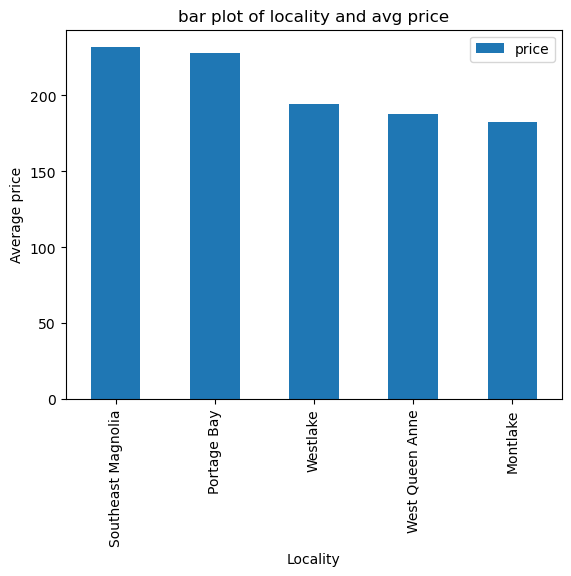

In [23]:
# .agg will be taking a map and can do additional aggregation based on different values of different columns

price_df = clean_df_listing.groupby("neighbourhood_cleansed").agg({"neighbourhood_cleansed": "last", "price":"mean"})

price_df.sort_values(by="price", ascending=False, inplace=True)

price_df.head().plot(kind='bar', x="neighbourhood_cleansed", y="price", ylabel="Average price", xlabel="Locality", title="bar plot of locality and avg price")

#### Answer
Its quite clear that `SouthEast Magnolia` is the most expensive area if `mean` is taken followed closely by `Portage Bay`

#### Q2 Does price affect the review score of the property?

In [24]:
correlation = clean_df_listing[["price", "review_scores_rating"]].corr()
print(correlation)

                         price  review_scores_rating
price                 1.000000              0.050488
review_scores_rating  0.050488              1.000000


/Users/anukin/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='price', ylabel='review_scores_rating'>

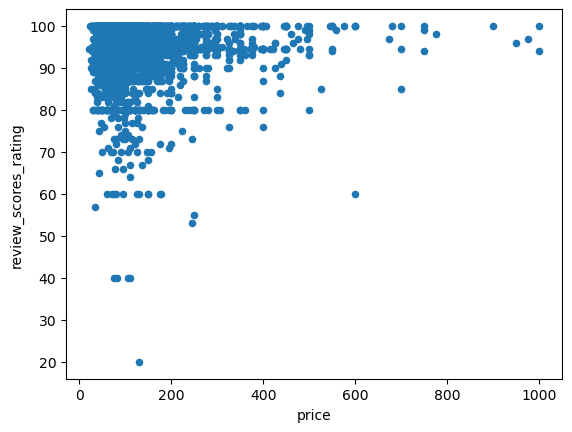

In [187]:
clean_df_listing.plot.scatter(x="price", y="review_scores_rating")

#### Answer
There is very slight correlation between price of a property and its review score. This can also be due to the fact that there are very few expensive rentals available. In conclusion there is not much of correlation between the price and review score rating

#### Q3 Does cancellation policy affect the review score?

<AxesSubplot: title={'center': 'cancellation policy with review scores'}, xlabel='cancellation_policy', ylabel='review_scores_rating'>

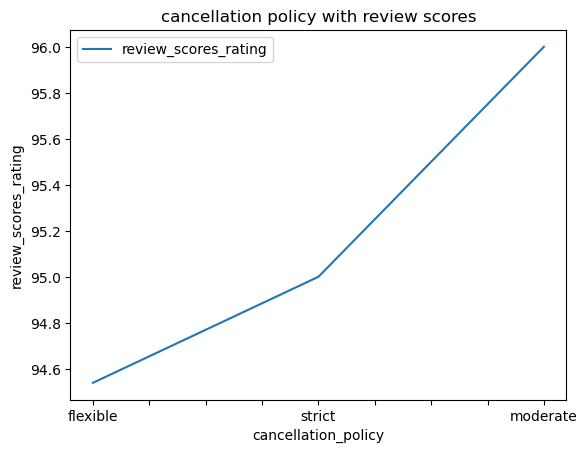

In [25]:
cancellation_review_score_df = clean_df_listing.groupby("cancellation_policy").agg({"cancellation_policy":"first", "review_scores_rating": "median"})
cancellation_review_score_df.sort_values(by="review_scores_rating", ascending=True, inplace=True)

cancellation_review_score_df.head()
cancellation_review_score_df.plot(x="cancellation_policy", y="review_scores_rating", xlabel="cancellation_policy",ylabel="review_scores_rating", title="cancellation policy with review scores")

Now this is a surprise for me. I was expecting that strict cancellation policy would adversely affect review scores. With these kind of numbers and delta its difficult to say that the cancellation policy affects review score in any reasonable way.  

#### Q4 Does host listings count affect the review score?

In [26]:
listings_count_review_score_corr = clean_df_listing[["calculated_host_listings_count", "review_scores_rating"]].corr()
print(listings_count_review_score_corr)

                                calculated_host_listings_count  \
calculated_host_listings_count                        1.000000   
review_scores_rating                                 -0.201949   

                                review_scores_rating  
calculated_host_listings_count             -0.201949  
review_scores_rating                        1.000000  


/Users/anukin/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='calculated_host_listings_count', ylabel='review_scores_rating'>

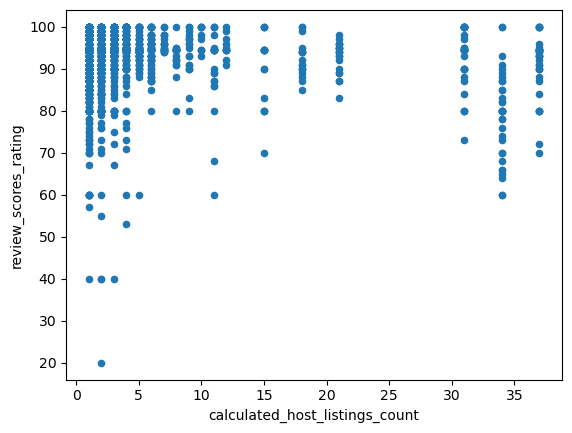

In [185]:
clean_df_listing.plot.scatter(x="calculated_host_listings_count", y="review_scores_rating")

There seems to be a slight negative correlation with host listing count and review score. The scatter plot indicates that there is a sweet spot in 15-25 range after which it reduces. The high score seems to be concetrated towards 0-5 range. The number of listings actually does affect the quality that can be maintained for a particular rental. 

##### Conclusion

* Price, cancellation policy etc does not affect review score that much
* Number of listing that the host had seems to adversely affect the review score
* The most expensive area based on median rental rate seems to be `South Eastern Magnolia`